In [27]:
import vdisp
import numpy as np
import scipy
import matplotlib.pyplot as plt


def interval(best,lo=np.nan,hi=np.nan):
    """
    Pythonized interval for easy output to yaml
    """
    return [float(best),[float(lo),float(hi)]]

def kde_peak(data, samples=1000):
    """
    Identify peak using Gaussian kernel density estimator.
    """
    return kde(data,samples)[0]

def kde(data, samples=1000):
    """
    Identify peak using Gaussian kernel density estimator.
    """
    # Clipping of severe outliers to concentrate more KDE samples in the parameter range of interest
    mad = np.median(np.fabs(np.median(data) - data))
    cut = (data > np.median(data) - 5. * mad) & (data < np.median(data) + 5. * mad)
    x = data[cut]
    kde = scipy.stats.gaussian_kde(x)
    # No penalty for using a finer sampling for KDE evaluation except computation time
    values = np.linspace(np.min(x), np.max(x), samples)
    kde_values = kde.evaluate(values)
    peak = values[np.argmax(kde_values)]
    return values[np.argmax(kde_values)], kde.evaluate(peak)


def peak_interval(data, alpha=_alpha, samples=1000):
    """
    Identify interval using Gaussian kernel density estimator.
    """
    peak = kde_peak(data,samples)
    x = np.sort(data.flat); n = len(x)
    # The number of entries in the interval
    window = int(np.rint((1.0-alpha)*n))
    # The start, stop, and width of all possible intervals
    starts = x[:n-window]; ends = x[window:]
    widths = ends - starts
    # Just the intervals containing the peak
    select = (peak >= starts) & (peak <= ends)
    widths = widths[select]
    if len(widths) == 0:
        raise ValueError('Too few elements for interval calculation')
    min_idx = np.argmin(widths)
    lo = x[min_idx]
    hi = x[min_idx+window]
    return interval(peak,lo,hi)

In [23]:
disp = 0.7
size = 10

mean, sigma2 = -100, disp**2 
print "True mean:", mean, "True std:", disp
print "Generating sample.... sample size", size

# make fake data
LOSV = np.random.normal(loc=mean, scale=np.sqrt(sigma2), size=size)
print "Before adding the error"
print "mean: ",np.mean(LOSV), "std: ", np.std(LOSV)

err=0.5 # assume the error is all 0.5 km/s
LOSV_err = np.zeros_like(LOSV)+err
LOSV = LOSV + np.random.normal(loc=0, scale=err, size=size) # add error to LOSV


True mean: -100 True std: 0.7
Generating sample.... sample size 10
Before adding the error
mean:  -99.7997607026 std:  0.478918835448


After adding the error of 0.5 km/s
From MCMC
mean:  -99.6678869876 std:  0.572953383149


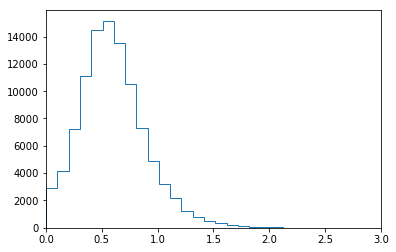

[0.5336105360831995, [0.00016970901757096257, 1.1336096651520338]]

In [26]:

print "After adding the error of", err, 'km/s'
out, sampler = vdisp.mcmc(LOSV, LOSV_err)
mu = out['mu']
sigma = out['sigma']
print "From MCMC"
print "mean: ",np.median(mu), "std: ", np.median(sigma)

plt.hist(out['sigma'], bins=30, histtype="step")
plt.xlim(0,3)
plt.show()
peak_interval(sigma, alpha=0.05)


In [16]:
def simulate_disp(disp, size):
    mean, sigma2 = -100, disp**2 
    #print "True mean:", mean, "True std:", disp
    #print "Generating sample.... sample size", size

    # make fake data
    LOSV = np.random.normal(loc=mean, scale=np.sqrt(sigma2), size=size)
    #print "Before adding the error"
    #print "mean: ",np.mean(LOSV), "std: ", np.std(LOSV)
    
    #print "diff:", abs(np.std(LOSV) - disp)
    if True:
    #if abs(np.std(LOSV) - disp) < 0.05:
        err=0.5 # assume the error is all 0.5 km/s
        LOSV_err = np.zeros_like(LOSV)+err
        LOSV = LOSV + np.random.normal(loc=0, scale=err, size=size) # add error to LOSV

        #print "After adding the error of", err, 'km/s'
        out, sampler = vdisp.mcmc(LOSV, LOSV_err)
        mu = out['mu']
        sigma = out['sigma']
        #print "From MCMC"
        #print "mean: ",np.median(mu), "std: ", np.mean(sigma)

        #plt.hist(out['sigma'], bins=30, histtype="step")
        #plt.show()
        interval = peak_interval(sigma, alpha=0.05)
        #print 'peak:',interval[0], "minimum:",interval[1][0]
        if interval[1][0] > 0.02:
            return 2
        else:
            return 1
    else:
        return 0

In [239]:
outlist=[]
disp = 1
size = 10
loop = 100
for i in range(100):
    print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2)    



outlist=[]
disp = 0.9
size = 10
loop = 100
for i in range(100):
    print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2) 



outlist=[]
disp = 0.8
size = 10
loop = 100
for i in range(100):
    print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2) 




outlist=[]
disp = 0.7
size = 10
loop = 100
for i in range(100):
    print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2) 




outlist=[]
disp = 0.6
size = 10
loop = 100
for i in range(100):
    print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2)



outlist=[]
disp = 0.5
size = 10
loop = 100
for i in range(100):
    #print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2) 



outlist=[]
disp = 0.4
size = 10
loop = 100
for i in range(100):
    print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2) 


outlist=[]
disp = 0.3
size = 10
loop = 100
for i in range(100):
    print i
    out = simulate_disp(disp, size)
    outlist.append(out)

print 'disp = ', disp
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
disp =  1
sample run: 100
sample resolved 97
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
disp =  0.9
sample run: 100
sample resolved 99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
disp =  0.8
sample run: 100
sample res

In [236]:
print 'sample run:',len(outlist) - sum(np.array(outlist)==0)
print 'sample resolved',sum(np.array(outlist)==2)

sample run: 100
sample resolved 90
